In [1]:
from essi21 import mixing as mm
import numpy as np
import matplotlib.pyplot as plt

labels = {
    'A': 'Micrometeorites',
    'B': 'Small impactors',
    'C': 'Simple craters (equil)',
    'D': 'Simple craters (stoch)',
    'E': 'Complex craters (stoch)',
}

fmts = {
    'A': 'rx',
    'B': 'b.',
    'C': 'y^',
    'D': 'm+',
    'E': 'c--',
}
plt.style.use('tableau-colorblind10')
plt.rcParams.update({
    'figure.figsize': (8, 8),
    'figure.facecolor': 'white',
    'xtick.top': True,
    'xtick.direction': 'in',
    'ytick.right': True,
    'ytick.direction': 'in',
})

time_arr = mm._TIME_ARR
regimes = ('A', 'B', 'C', 'D', 'E')
random_seed = mm.RANDOM_SEED

def get_ice_arrs(time_arr, regimes, seed):
    mm.set_seed(seed)
    ice_arrs = {r: np.zeros(len(time_arr)) for r in regimes}
    for t, age in enumerate(time_arr):
        for r in regimes:
            ice_mass = mm.total_impact_ice(age, [r]) * mm.ICE_HOP_EFFICIENCY
            ice_thickness = mm.get_ice_thickness(ice_mass)
            ice_arrs[r][t] = ice_thickness
    return ice_arrs

# ice_arrs = get_ice_arrs(time_arr, regimes, random_seed)

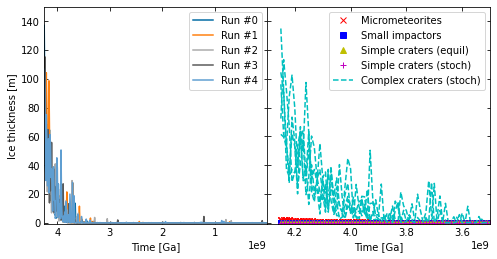

In [12]:
# Plots
f, axs = plt.subplots(1, 2, sharey=True, figsize=(8, 4))
f.subplots_adjust(wspace=0)

for seed in np.arange(5):
    impact_ice_arrs = get_ice_arrs(time_arr, regimes, seed)
    total_ice = np.zeros(len(time_arr))
    for r in regimes:
        label = labels[r] if seed == 0 else None
        axs[1].plot(time_arr, impact_ice_arrs[r], fmts[r], label=label)
        total_ice += impact_ice_arrs[r]
    axs[0].plot(time_arr, total_ice, '-', label=f'Run #{seed}')

for ax in axs:
    ax.set_xlabel('Time [Ga]')
    ax.legend()
    ax.set_ylim(-1, 150)
axs[0].set_xlim(time_arr.max()+time_arr.min(), time_arr.min())
axs[1].set_xlim(4.3e9, 3.5e9)
axs[0].set_ylabel('Ice thickness [m]')

# plt.savefig('/home/cjtu/projects/essi21/figs/impactor_ice_ivanov_pf.png')
plt.show()

In [3]:
n1 = 458972266921200.25
n2 = 460219325452746.3 - n1
n3 = 460621505615327.1 - n2
n4 = 488498512901853.1 - n3
n5 = 1332571510497598.5 - n4
print(f'A (tested): {n1:.4e}')
print(f'B (tested): {n2:.4e}')
print(f'C: {n3:.4e}')
print(f'D: {n4:.4e}')
print(f'E: {n5:.4e}')


A (tested): 4.5897e+14
B (tested): 1.2471e+12
C: 4.5937e+14
D: 2.9124e+13
E: 1.3034e+15


In [4]:
# Total ice mass at first timestep 4.25 Ga
hopeff = mm.ICE_HOP_EFFICIENCY
print(f'Run total ice mass at 4.25 Ga: {total_ice[0]:.3e} kg')

# Cannon mass range from Supp thicknesses
min_thick = 10  # [m]
vol = min_thick * mm.COLDTRAP_AREA
mass = vol * 934
mass_pre_hop = mass / hopeff
print(f'Min total ice mass at 4.25 Ga: {mass_pre_hop:.3e} kg')

max_thick = 160  # [m]
vol = max_thick * mm.COLDTRAP_AREA
mass = vol * 934
mass_pre_hop = mass / hopeff
print(f'Max total ice mass at 4.25 Ga: {mass_pre_hop:.3e} kg')

Run total ice mass at 4.25 Ga: 7.077e+01 kg
Min total ice mass at 4.25 Ga: 2.249e+15 kg
Max total ice mass at 4.25 Ga: 3.598e+16 kg


(4300000000.0, 3600000000.0)

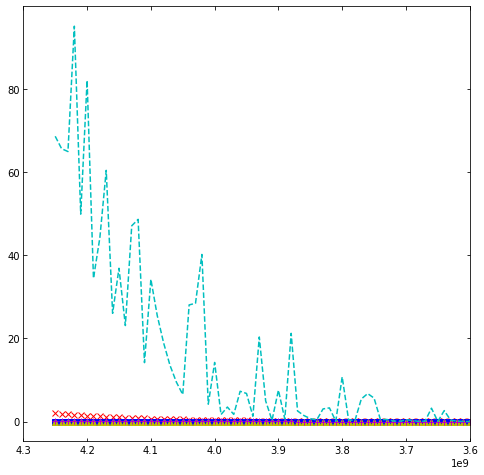

In [5]:
fmts = {
    'A': 'rx',
    'B': 'bs',
    'C': 'y^',
    'D': 'm+',
    'E': 'c--',
}
for r in regimes:
    label = labels[r]
    plt.plot(time_arr, impact_ice_arrs[r], fmts[r], label=label)
plt.xlim(4.3e9, 3.6e9)

In [6]:
sfd_slope = mm.SFD_SLOPES['E']
crater_diams = mm.get_diam_array('E')
n_craters = mm.neukum(crater_diams[0]) - mm.neukum(crater_diams[-1])
n_craters *= mm.TIMESTEP * mm.SA_MOON * mm.impact_flux(4.3e9) / mm.impact_flux(0)  # 918 craters
sfd = crater_diams ** sfd_slope
sfd_prob = sfd / np.sum(sfd)

n_craters = mm.probabalistic_round(n_craters)  # 919
crater_diams = mm._RNG.choice(crater_diams, n_craters, p=sfd_prob)

In [7]:
df = mm.read_crater_list()
df2 = mm.randomize_crater_ages(df)
df2.head()

,cname,lat,lon,diam,age,age_low,age_upp,psr_area,age_ref,priority,notes,rad,x,y,dist2pole
0,Haworth,-87.5,354.8,51400.0,4.170000e+09,20000000.0,20000000.0,1.017932e+09,Cannon et al. 2020,1,NaN,25700.0,-6866.947452,75455.049594,75790.922768
1,Shoemaker,-88.1,45.9,51800.0,4.150000e+09,20000000.0,20000000.0,1.075518e+09,Cannon et al. 2020,1,NaN,25900.0,41357.284767,40077.997131,57601.101304
2,Faustini,-87.2,84.3,42500.0,4.120000e+09,30000000.0,30000000.0,6.639340e+08,Cannon et al. 2020,1,NaN,21250.0,84432.505109,8427.484385,84885.833500
5,Cabeus B,-82.3,305.4,59600.0,3.950000e+09,100000000.0,100000000.0,3.872050e+08,Cannon et al. 2020,2,NaN,29800.0,-189707.955730,134818.426723,233436.042125
8,Idel'son L,-84.0,118.6,28000.0,3.940000e+09,100000000.0,100000000.0,3.267790e+08,Cannon et al. 2020,2,NaN,14000.0,159411.804849,-86914.137490,181898.214643


In [8]:
length = mm.diam2len_collins(1200, 20e3, rho_t=mm.BULK_DENSITY)
length

49.81892598915707

In [9]:
length = mm.diam2len_johnson(1200, 20e3, rho_t=mm.BULK_DENSITY)
length

16.836842472622543